# 

# 

## Flower Image Classification

### Project Objective:

The central objective of this deep learning project is to create a predictive model capable of accurately identifying the type of flowers depicted in images. Utilizing advanced deep learning algorithms, we aim to develop a robust system that can analyze and classify flowers based on their visual characteristics.

# 

### Importing Packages

In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.12.0'

In [2]:
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# 

### Passing location of Base folder 

In [3]:
base_dir = r"C:\Users\tanay\Desktop\Jupyter Files\Deep Learning\2) CNN\2) Practical Dataset\flower_photos"

# 

### Setting Image size & Batch size

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

# 

### Creating Arguments for Training data

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.1)

# 

### Creating Arguments for Testing data

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split=0.1)

# 

### Passing Arguments on Training data

In [7]:
training_set = train_datagen.flow_from_directory(base_dir, 
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 subset='training')

Found 3306 images belonging to 5 classes.


# 

### Passing Arguments on newly created Testing data

In [8]:
test_set = test_datagen.flow_from_directory(base_dir, 
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 subset='validation')

Found 364 images belonging to 5 classes.


# 

### Checking Classes in Training & Testing data

In [9]:
training_set.classes

array([0, 0, 0, ..., 4, 4, 4])

In [10]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

# 

### Checking Encodes

In [11]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

# 

### Creating CNN model

In [12]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [77]:
model = Sequential()

model.add(Conv2D(filters = 32, padding='same', kernel_size=3, activation='relu',input_shape=(224,224,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64, padding='same', kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128, padding='same', kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256, padding='same', kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

In [78]:
#model.add(Dropout(0.5))
model.add(Flatten())

#model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=256, activation='relu'))
#model.add(Dropout(0.2))

In [79]:
model.add(Dense(5,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 28, 28, 128)     

# 

### Compilation

In [81]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 

### Training the Model

In [82]:
r = model.fit(training_set,epochs=25,validation_data=test_set)

Epoch 1/25
52/52 [==============================] - 191s 4s/step - loss: 1.3806 - accuracy: 0.3969 - val_loss: 1.1620 - val_accuracy: 0.5055
Epoch 2/25
52/52 [==============================] - 196s 4s/step - loss: 1.0619 - accuracy: 0.5687 - val_loss: 1.1148 - val_accuracy: 0.5412
Epoch 3/25
52/52 [==============================] - 195s 4s/step - loss: 0.9408 - accuracy: 0.6258 - val_loss: 1.0069 - val_accuracy: 0.6099
Epoch 4/25
52/52 [==============================] - 190s 4s/step - loss: 0.8590 - accuracy: 0.6552 - val_loss: 0.9777 - val_accuracy: 0.6291
Epoch 5/25
52/52 [==============================] - 185s 4s/step - loss: 0.7766 - accuracy: 0.7011 - val_loss: 0.9815 - val_accuracy: 0.6401
Epoch 6/25
52/52 [==============================] - 189s 4s/step - loss: 0.7660 - accuracy: 0.7005 - val_loss: 0.9446 - val_accuracy: 0.6209
Epoch 7/25
52/52 [==============================] - 189s 4s/step - loss: 0.6885 - accuracy: 0.7317 - val_loss: 0.8813 - val_accuracy: 0.6786
Epoch 8/25
52

# 

### Plotting Loss

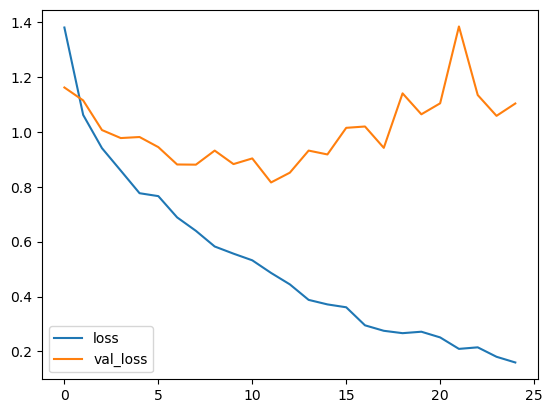

In [83]:
plt.plot(r.history['loss'], label='loss') 
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 

### Plotting Accuracy

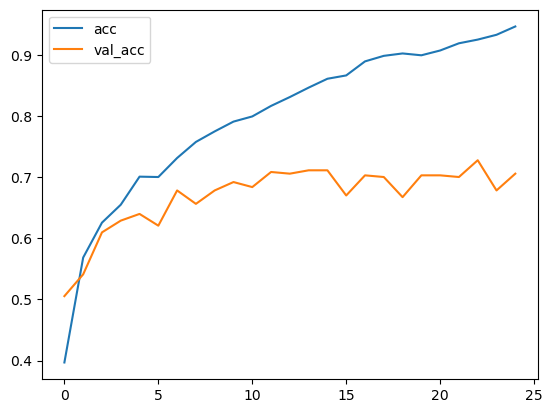

In [84]:
plt.plot(r.history['accuracy'], label='acc') 
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# 

### Evaluation Testing data

In [85]:
model.evaluate(test_set)

6/6 [==============================] - 5s 792ms/step - loss: 1.1036 - accuracy: 0.7060


[1.1036245822906494, 0.7060439586639404]

# 

### Predicton 

In [86]:
import cv2 
def analyze_image(test_img):
    plt.imshow(test_img)
    print(test_img.shape)
    test_img = cv2.resize(test_img,(224,224))
    test_input = test_img.reshape((1,224,224,3))
    p = model.predict(test_input)
    print(np.argmax(p))

(240, 320, 3)
1/1 [==============================] - 0s 38ms/step
2


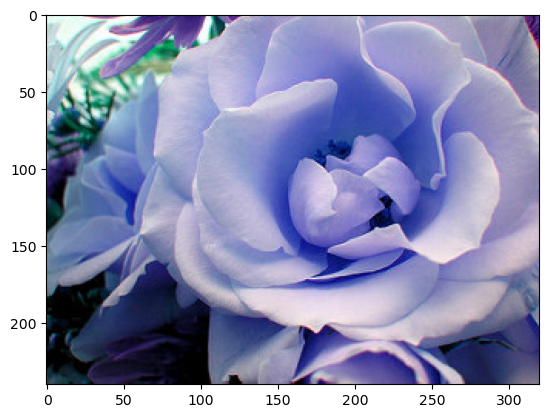

In [88]:
test_img = cv2.imread('flower_photos/roses/12240303_80d87f77a3_n.jpg')
analyze_image(test_img)

(234, 320, 3)
1/1 [==============================] - 0s 36ms/step
4


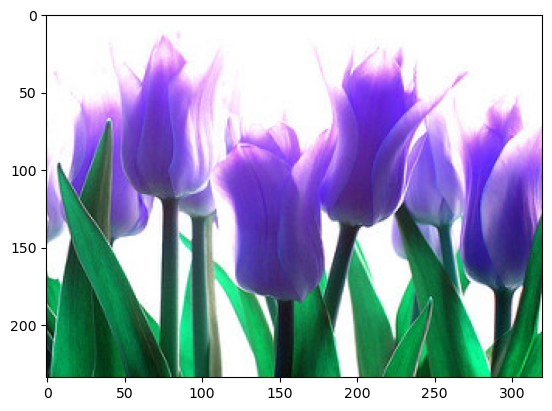

In [89]:
test_img = cv2.imread('flower_photos/tulips/112428919_f0c5ad7d9d_n.jpg')
analyze_image(test_img)

(436, 500, 3)
1/1 [==============================] - 0s 37ms/step
0


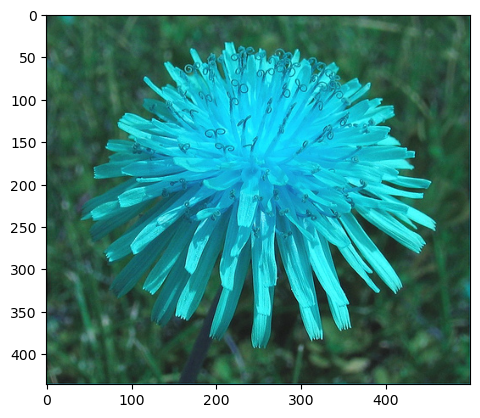

In [90]:
test_img = cv2.imread('flower_photos/dandelion/1195255751_d58b3d3076.jpg')
analyze_image(test_img)

(375, 500, 3)
1/1 [==============================] - 0s 35ms/step
0


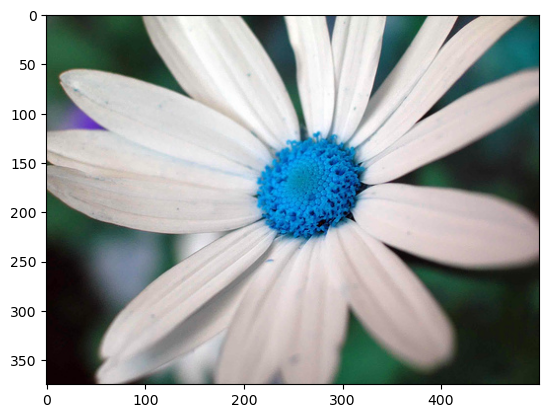

In [91]:
test_img = cv2.imread('flower_photos/daisy/43474673_7bb4465a86.jpg')
analyze_image(test_img)

# 

# 

# 